In [1]:
import pandas as pd

## Elaborar series de tiempo

### Listar archivos trimestrales

In [2]:
# import glob
# frac = 0.02
# path ='./../data/yr_samples/RFReg_' # use your path
# # path ='./../data/Pobreza/pobreza_' # use your path
# 0.02
# allFiles = []
# allFiles += glob.glob(path+str(frac)+'ARG*.csv')
# allFiles = sorted(allFiles)
# allFiles

In [3]:
import glob
frac = 0.02
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
allFiles

['./../data/Pobreza\\pobreza_0.02_q2003-09-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2003-12-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2004-03-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2004-06-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2004-09-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2004-12-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2005-03-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2005-06-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2005-09-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2005-12-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2006-03-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2006-06-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2006-09-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2006-12-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2007-03-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2007-06-30.csv',
 './../data/Pobreza\\pobreza_0.02_q2007-12-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2008-03-31.csv',
 './../data/Pobreza\\pobreza_0.02_q2008-06-30.csv',
 './../data/

In [4]:
pd.read_csv(allFiles[-1], nrows = 5).columns

Index(['index', 'RADIO_REF_ID', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16', 'IX_TOT',
       'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'CAT_OCUP',
       'CAT_INAC', 'P47T_persona', 'ANO4', 'Q', 'P0910', 'Grupo Etario',
       'P47T_hogar', 'CBA', 'CBT', 'Pobreza', 'Indigencia', 'gap_pobreza',
       'gap_indigencia', 'IDFRAC', 'PROV', 'NOMPROV', 'AGLOMERADO', 'Region'],
      dtype='object')

In [5]:
# set(pd.read_csv(allFiles[-1], nrows = 5).columns) - set(pd.read_csv(allFiles[0], nrows = 5).columns)
# {'ANO4',
#  'CAT_INAC',
#  'CAT_OCUP',
#  'Grupo Etario',
#  'H15',
#  'H16',
#  'IDFRAC',
#  'IX_TOT',
#  'PROV',
#  'gap_indigencia',
#  'gap_pobreza',
#  'index'}

### Funciones crear cuadro resumen

In [6]:
import numpy as np

def cuadro_resumen_por_area(data, grouper = ['Q','Region','NOMAGLO']):

    # Individuos
        # pobreza n, pct
        # indigencia n, pct
        
    df = data.groupby(grouper)[['Pobreza', 'Indigencia']].agg(
        {'Pobreza': ['mean', 'sum'], 'Indigencia': ['mean', 'sum']})

    df[[('Pobreza', 'sum')]] = (df[[('Pobreza', 'sum')]]/frac/1e3).round(1)#.astype(int)
    df[[('Indigencia', 'sum')]] = (df[[('Indigencia', 'sum')]]/frac/1e3).round(1)#.astype(int)
    df[[('Pobreza', 'mean')]] = 100*df[[('Pobreza', 'mean')]].round(4)
    df[[('Indigencia', 'mean')]] = 100*df[[('Indigencia', 'mean')]].round(4)
    
    dfA = df.T.set_index(np.repeat('Personas', df.shape[1]), append=True).T

    # Mayores
        # ingresos mean, median
    df = data.loc[data.P03 > 24].groupby(grouper)[['Pobreza', 'Indigencia','P47T_persona']].agg(
        {'Pobreza': 'mean', 'Indigencia': 'mean', 'P47T_persona':['mean', 'median']})
    df[[('Pobreza', 'mean')]] = 100*df[[('Pobreza', 'mean')]].round(4)
    df[[('Indigencia', 'mean')]] = 100*df[[('Indigencia', 'mean')]].round(4)
    df['P47T_persona'] = df['P47T_persona'].round(-2).astype(int)    
    dfB = df.T.set_index(np.repeat('Mayores de 24', df.shape[1]), append=True).T

    # Hogares
        # pobreza n, pct
        # indigencia n, pct
        # ingresos mean, median
        # CBA, mean median
        # CBT, mean median
        # gap, mean median
    df = data.groupby('HOGAR_REF_ID').first().groupby(grouper)[['Pobreza', 'Indigencia', 'P47T_hogar', 'CBA', 'gap_indigencia', 'CBT', 'gap_pobreza']].agg(
    {'Pobreza': ['mean', 'sum'], 'Indigencia': ['mean', 'sum'], 'P47T_hogar': ['mean', 'median'],
     'CBA': ['mean', 'median'], 'gap_indigencia': ['mean', 'median'], 
     'CBT': ['mean', 'median'], 'gap_pobreza': ['mean', 'median']})
    
    df[[('Pobreza', 'sum')]] = (df[[('Pobreza', 'sum')]]/frac/1e3).round(1)#.astype(int)
    df[[('Indigencia', 'sum')]] = (df[[('Indigencia', 'sum')]]/frac/1e3).round(1)#.astype(int)
    df[[('Pobreza', 'mean')]] = 100*df[[('Pobreza', 'mean')]].round(4)
    df[[('Indigencia', 'mean')]] = 100*df[[('Indigencia', 'mean')]].round(4)
    df[[('P47T_hogar', 'median')]] = df[[('P47T_hogar', 'median')]].round(-2).astype(int)
    df[[('P47T_hogar', 'mean')]] = df[[('P47T_hogar', 'mean')]].round(-2).astype(int)
    df[[('CBA', 'median')]] = df[[('CBA', 'median')]].round(-2).astype(int)
    df[[('CBA', 'mean')]] = df[[('CBA', 'mean')]].round(-2).astype(int)
    df[[('gap_indigencia', 'median')]] = df[[('gap_indigencia', 'median')]].round(-2).astype(int)
    df[[('gap_indigencia', 'mean')]] = df[[('gap_indigencia', 'mean')]].round(-2).astype(int)
    df[[('CBT', 'median')]] = df[[('CBT', 'median')]].round(-2).astype(int)
    df[[('CBT', 'mean')]] = df[[('CBT', 'mean')]].round(-2).astype(int)
    df[[('gap_pobreza', 'median')]] = df[[('gap_pobreza', 'median')]].round(-2).astype(int)
    df[[('gap_pobreza', 'mean')]] = df[[('gap_pobreza', 'mean')]].round(-2).astype(int)
    
    dfC = df.T.set_index(np.repeat('Hogares', df.shape[1]), append=True).T

    # Hogares pobres
        # gap mean, median
    df = data.loc[data.Pobreza].groupby('HOGAR_REF_ID').first().groupby(grouper)[['gap_pobreza']].agg(['mean', 'median']).round(-2).astype(int)
    dfD = df.T.set_index(np.repeat('Hogares en pobreza', df.shape[1]), append=True).T

    result = pd.concat([dfA, dfB, dfC, dfD], axis = 1)
    return result

### Computar

In [7]:
### Se carga la informacion de condiciones de pobreza de cada cuatrimestre y computa el valor sintetico (ej. pobreza por provincia/aglomerado)

In [8]:
## Se ahorra algo de tiempo eligiendo las columnas a importar..

# %%timeit
# pd.read_csv(f)

# 2.09 s ± 49.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# %%timeit
# pd.read_csv(f, usecols = grouper + ['Pobreza', 'Indigencia', 'P03', 'P47T_persona', 'HOGAR_REF_ID', 'P47T_hogar', 'CBA', 'CBT', 'gap'])

# 1.31 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

#  pero parece que conviene usar el siguiente loop donde cada info trimestral que se carga se agrupa, y luego se juntan los resultados:

In [9]:
# # Es posible que deba  instalar el siguiente modulo
# import unidecode

# Para ello, una vez instalado pip (https://phoenixnap.com/kb/install-pip-windows) se puede correr en una terminal:
# pip install unidecode
# asegurarse que la carpeta unidecode esta en el PATH donde python lee los modulos.
# Ej. anaconda3/lib/site-packages

result_list1 = []
result_list2 = []
result_list3 = []
result_list4 = []
result_list5 = []
result_list6 = []
result_list7 = []

for f in allFiles:
    print(f)
    data = pd.read_csv(f)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total pais'] = True
#     data['NOMPROV'] = [unidecode.unidecode(s) for s in data['NOMPROV'].values]

    # EDITAR ACA
    result1 = cuadro_resumen_por_area(data, ['Q','Region','AGLOMERADO']).sort_index(1)
    result2 = cuadro_resumen_por_area(data, ['Q','PROV']).sort_index(1)
    result3 = cuadro_resumen_por_area(data, ['Q','AGLO_si']).sort_index(1)
    result4 = cuadro_resumen_por_area(data, ['Q','P0910']).sort_index(1)
    result5 = cuadro_resumen_por_area(data, ['Q','Total pais']).sort_index(1)
    result6 = cuadro_resumen_por_area(data.loc[data.AGLOMERADO.isin([33, 32, 2])], 
                                      ['Q','DPTO']).sort_index(1)
    result7 = cuadro_resumen_por_area(data, ['Q','Region']).sort_index(1)
    
    for i, result in enumerate([result1, result2, result3, result4, result5, result6, result7]):
        _list = [result_list1, result_list2, result_list3, result_list4, result_list5, result_list6, result_list7][i]
        _list += [result]

./../data/Pobreza\pobreza_0.02_q2003-09-30.csv
./../data/Pobreza\pobreza_0.02_q2003-12-31.csv
./../data/Pobreza\pobreza_0.02_q2004-03-31.csv
./../data/Pobreza\pobreza_0.02_q2004-06-30.csv
./../data/Pobreza\pobreza_0.02_q2004-09-30.csv
./../data/Pobreza\pobreza_0.02_q2004-12-31.csv
./../data/Pobreza\pobreza_0.02_q2005-03-31.csv
./../data/Pobreza\pobreza_0.02_q2005-06-30.csv
./../data/Pobreza\pobreza_0.02_q2005-09-30.csv
./../data/Pobreza\pobreza_0.02_q2005-12-31.csv
./../data/Pobreza\pobreza_0.02_q2006-03-31.csv
./../data/Pobreza\pobreza_0.02_q2006-06-30.csv
./../data/Pobreza\pobreza_0.02_q2006-09-30.csv
./../data/Pobreza\pobreza_0.02_q2006-12-31.csv
./../data/Pobreza\pobreza_0.02_q2007-03-31.csv
./../data/Pobreza\pobreza_0.02_q2007-06-30.csv
./../data/Pobreza\pobreza_0.02_q2007-12-31.csv
./../data/Pobreza\pobreza_0.02_q2008-03-31.csv
./../data/Pobreza\pobreza_0.02_q2008-06-30.csv
./../data/Pobreza\pobreza_0.02_q2008-09-30.csv
./../data/Pobreza\pobreza_0.02_q2008-12-31.csv
./../data/Pob

In [10]:
cuadro1 = pd.concat(result_list1)
cuadro2 = pd.concat(result_list2)
cuadro3 = pd.concat(result_list3)
cuadro4 = pd.concat(result_list4)
cuadro5 = pd.concat(result_list5)
cuadro6 = pd.concat(result_list6)
cuadro7 = pd.concat(result_list7)
# En caso de 'por niveles educativos' tiramos hogares y menores.
cuadro4 = cuadro4.loc[:, cuadro4.columns.get_level_values(2) == 'Mayores de 24']

In [11]:
import os

for i, cuadro in enumerate([cuadro1, cuadro2, cuadro3, cuadro4, cuadro5, cuadro6, cuadro7]):
    dom = ['ARG', 'ARG', 'ARG', 'ARG', 'ARG', 'AMBA', 'ARG'][i]
    if not os.path.exists('./../data/cuadros/'):
        os.makedirs('./../data/cuadros/')
    cuadro.to_csv('./../data/cuadros/cuadro'+str(i)+'_'+str(frac)+'_'+dom) # should be i+1

In [12]:
import seaborn as sns
pal = sns.color_palette("tab10")
# print(pal.as_hex()[:6])

(0.0, 75.97699999999999)

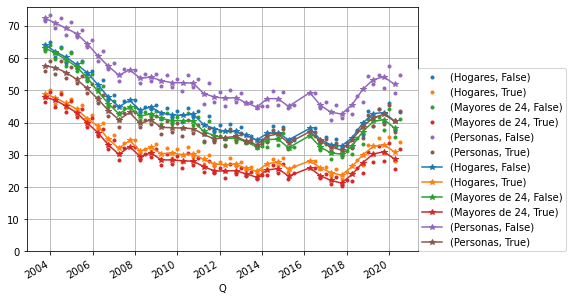

In [13]:
import matplotlib.pyplot as plt

df = cuadro3['Pobreza']['mean'].unstack()
df.index = pd.to_datetime(df.index) #- pd.offsets.DateOffset(10)

fig, ax = plt.subplots(1, figsize = (7, 5))

df.plot(lw = 0, marker = '.', ax = ax, color = pal.as_hex()[:6])

# df.groupby(pd.Grouper(level = 0, freq='6M')).mean().plot(ax = ax, color = pal.as_hex()[:6])

years = df.index.year.astype(int)
semes = (df.index.month.astype(int) - 1) // 6
grouped = df.groupby([years, semes])
mn = grouped.mean();
idx = mn.index.get_level_values(0).astype(str) +  (1 + 6 * mn.index.get_level_values(1)).astype(str)
idx = pd.to_datetime(idx, format='%Y%m') + pd.offsets.DateOffset(months=3)
mn.index = idx

mn.plot(marker = '*', ax = ax, color = pal.as_hex()[:6])

ax.legend(loc = (1, 0))

plt.grid()
# plt.xlim(13000, )
plt.ylim(0, )